In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data =pd.read_excel("/content/Group6.xlsx")
data

,S1,S2,S3
0,432,374,404
1,423,374,399
2,433,374,389
3,456,388,388
4,427,378,402
...,...,...,...
286,439,377,425
287,432,386,430
288,427,370,433
289,421,379,425


**○	Compute the covariance between three variables**

In [ ]:
cov_mat = data.cov()
cov_mat

,S1,S2,S3
S1,92.609195,-0.554023,-5.958621
S2,-0.554023,25.188648,5.899147
S3,-5.958621,5.899147,129.170636


**○ Compute the correlation coefficients between three variables Inorder to show the correlation between S1,S2 and S3 variables we use a correlation matrix**.

In [ ]:
corr_mat = data.corr()
corr_mat

,S1,S2,S3
S1,1.000000,-0.011471,-0.05448
S2,-0.011471,1.000000,0.10342
S3,-0.054480,0.103420,1.00000


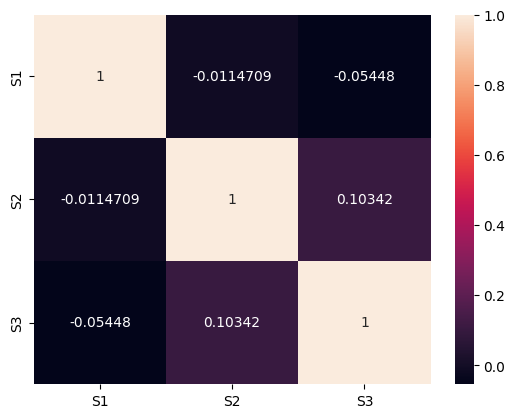

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming that the correlation matrix is stored in a dataframe called 'corr_mat'
sns.heatmap(corr_mat, annot=True, fmt='g')
plt.show()

The diagonal elements of the correlation matrix is 1,since each variable are perfectly correlated.
- S1 & S2--- -0.011471 which indicates that a very weak negative correlation
- S1 & S3 ----- -0.054480 which indicates that weak negative correlation .
- S2 & S3 --- 0.103420 means a weak postive correlation.

#○	Plot and report the relationships between the variables

<function matplotlib.pyplot.show(close=None, block=None)>

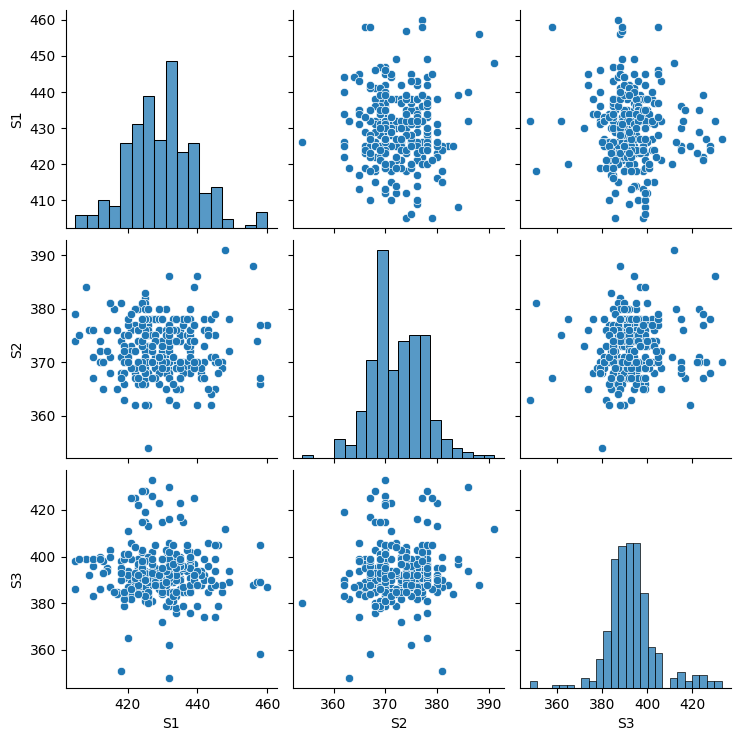

In [ ]:
import seaborn as sns

sns.pairplot(data)
plt.show

##Generate a random sample of 50 observations for each sensor

In [ ]:
sample_size = 50
# Generating random sample of 50observations for each sensor
S1_50 = data['S1'].sample(sample_size)
S2_50 = data['S2'].sample(sample_size)
S3_50 = data['S3'].sample(sample_size)
# combine all into one dataframe
sample_new = pd.DataFrame({'S1':S1_50,'S2':S2_50,'S3':S3_50})

#○ Compute the upper and the lower bounds with confidence intervals 90%, 95%, 99%.

In [ ]:
#computhe the mean and the std
mean = np.mean(sample_new)
std_dev = np.std(sample_new)

# z value for 90%, 95%, and 99% confidence intervals
z_val= {90: 1.645, 95: 1.96, 99: 2.576} #dictionary storing the value of z

# Check if the mean value is within the confidence interval for each column
for sensor in sample_new.columns:
    print(f"Sensor {sensor}:")
    for confidence_level in [90, 95, 99]:
        z = z_val[confidence_level]
        lower_bound = mean[sensor] - z * (std_dev[sensor] / np.sqrt(len(data)))
        upper_bound = mean[sensor] + z * (std_dev[sensor] / np.sqrt(len(data)))
        if lower_bound <= mean[sensor] <= upper_bound:
            print(f"\tMean value of {mean[sensor]} is within the {confidence_level}% confidence interval of ({lower_bound:.3f}, {upper_bound:.3f})")
        else:
            print(f"\tMean value of {mean[sensor]} is outside the {confidence_level}% confidence interval of ({lower_bound:.3f}, {upper_bound:.3f})")

Sensor S1:
	Mean value of 428.26 is within the 90% confidence interval of (427.375, 429.145)
	Mean value of 428.26 is within the 95% confidence interval of (427.205, 429.315)
	Mean value of 428.26 is within the 99% confidence interval of (426.873, 429.647)
Sensor S2:
	Mean value of 371.96 is within the 90% confidence interval of (371.391, 372.529)
	Mean value of 371.96 is within the 95% confidence interval of (371.282, 372.638)
	Mean value of 371.96 is within the 99% confidence interval of (371.069, 372.851)
Sensor S3:
	Mean value of 392.72 is within the 90% confidence interval of (391.648, 393.792)
	Mean value of 392.72 is within the 95% confidence interval of (391.443, 393.997)
	Mean value of 392.72 is within the 99% confidence interval of (391.041, 394.399)


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


So from this we can say that the mean values of the 3 sensors has fallen correctly in the three levels of confidence.
Hence, we could say that the mean values of the samples taken represents the population means,